<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/EMM441GeogebraCooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem:
A small amount of water cools rapidly after being poured from a kettle into a cup. The time t , in seconds, and the temperature T , in °C, are given in Table 3.6. The ambient temperature was, at the time of the experiment, measured to be 22.3 °C. Find a model that fits these data well. Use this model to determine the time it will take to cool the water all the way down to 26 °C. (The activity is taken from Hall, A, (2017). Mathematical modeling: applications with GeoGebra. Wiley. There is a companion website with GeoGebra files at https://bcs.wiley.com/he-bcs/Books?action=index&bcsId=10240&itemId=1119102723)


##Solution:
To model the cooling of water from the data provided, we can employ Newton's Law of Cooling. According to this law, the rate of change of the temperature $ T $ of an object is proportional to the difference between the ambient temperature $ T_a $ and the object’s temperature $ T $. The equation can be expressed as:
$$
\frac{dT}{dt} = -k(T - T_a)
$$
where:
- $ T $ is the temperature of the object (water in this case) at time $ t $,
- $ T_a $ is the ambient temperature (22.3°C),
- $ k $ is a positive constant, and
- $ t $ is the time in seconds.

We can integrate this differential equation to obtain:
$$
T(t) = T_a + (T_0 - T_a)e^{-kt}
$$
where $ T_0 $ is the initial temperature of the water.

To fit this model to the data:
1. We first assign the provided data to arrays for time `t` and temperature `T`.
2. We fit the model using non-linear least squares to estimate the parameters $ T_0 $ and $ k $.
3. We use the estimated parameters to predict the time at which the temperature will reach 26°C.


To model the cooling of water from the data provided, we can employ Newton's Law of Cooling. According to this law, the rate of change of the temperature $ T $ of an object is proportional to the difference between the ambient temperature $ T_a $ and the object’s temperature $ T $. The equation can be expressed as:
$$
\frac{dT}{dt} = -k(T - T_a)
$$
where:
- $ T $ is the temperature of the object (water in this case) at time $ t $,
- $ T_a $ is the ambient temperature (22.3°C),
- $ k $ is a positive constant, and
- $ t $ is the time in seconds.

We can integrate this differential equation to obtain:
$$
T(t) = T_a + (T_0 - T_a)e^{-kt}
$$
where $ T_0 $ is the initial temperature of the water.

To fit this model to the data:
1. We first assign the provided data to arrays for time `t` and temperature `T`.
2. We fit the model using non-linear least squares to estimate the parameters $ T_0 $ and $ k $.
3. We use the estimated parameters to predict the time at which the temperature will reach 26°C.


In this code:
- We model the cooling using Newton's Law.
- We use `curve_fit` to estimate $ T_0 $ and $ k $ based on the actual data.
- We predict the time to reach 26°C using `fsolve`.
- We plot the data and the fitted model for visual verification.



##Implementation:

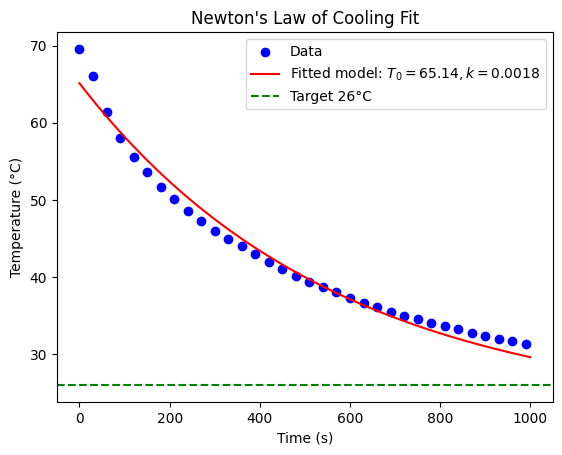

Estimated initial temperature: 65.14 °C
Estimated cooling constant: 0.0018 per second
Estimated time to reach 26°C: 1383.85 seconds


In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data from the table
time = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990])
temperature = np.array([69.58, 66.11, 61.41, 58.07, 55.60, 53.58, 51.66, 50.05, 48.52, 47.24, 46.00, 44.96, 43.96, 42.92, 41.95, 41.05, 40.18, 39.40, 38.70, 38.00, 37.32, 36.67, 36.08, 35.50, 35.00, 34.53, 34.04, 33.59, 33.20, 32.76, 32.37, 32.00, 31.64, 31.30])

# Ambient temperature
Ta = 22.3

# Define the model function
def cooling_model(t, T0, k):
    return Ta + (T0 - Ta) * np.exp(-k * t)

# Fit the model to the data
params, covariance = curve_fit(cooling_model, time, temperature, p0=[70, 0.01])

# Extract the parameters
T0_fit, k_fit = params

# Calculate the time when the temperature reaches 26°C
from scipy.optimize import fsolve
time_26 = fsolve(lambda t: cooling_model(t, T0_fit, k_fit) - 26, 1000)  # start search at 1000 seconds

# Plot the data and the fitted model
plt.scatter(time, temperature, color='blue', label='Data')
t_fit = np.linspace(0, 1000, 100)
T_fit = cooling_model(t_fit, T0_fit, k_fit)
plt.plot(t_fit, T_fit, color='red', label=f'Fitted model: $T_0={T0_fit:.2f}, k={k_fit:.4f}$')
plt.axhline(y=26, color='green', linestyle='--', label='Target 26°C')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Newton\'s Law of Cooling Fit')
plt.show()

print(f"Estimated initial temperature: {T0_fit:.2f} °C")
print(f"Estimated cooling constant: {k_fit:.4f} per second")
print(f"Estimated time to reach 26°C: {time_26[0]:.2f} seconds")


##Another go at it :)

To visualize and better understand the best fit solution using Newton's Law of Cooling, as well as to determine the time it takes for the temperature to decrease to 26°C:

### The Model
The Newton's Law of Cooling model we are using is:
$$
T(t) = T_a + (T_0 - T_a) \cdot e^{-kt}
$$
where:
- $ T(t) $ is the temperature of the water at time $ t $,
- $ T_a = 22.3 \, \text{°C} $ (ambient temperature),
- $ T_0 $ is the initial temperature of the water,
- $ k $ is the cooling constant,
- $ t $ is the time in seconds.

### Fitting the Model
We fit this model to the experimental data using non-linear least squares optimization. The optimization adjusts $ T_0 $ and $ k $ to minimize the difference between the observed temperatures and those predicted by our model.

### Calculating Time to Reach 26°C
To find the time $ t $ when $ T(t) = 26 \, \text{°C} $, we solve:

$$
26 = T_a + (T_0 - T_a) \cdot e^{-kt}
$$

Rearranging the equation to solve for $ t $ gives:

$$
e^{-kt} = \frac{26 - T_a}{T_0 - T_a}
$$

$$
-kt = \log\left(\frac{26 - T_a}{T_0 - T_a}\right)
$$

$$
t = -\frac{1}{k} \log\left(\frac{26 - T_a}{T_0 - T_a}\right)
$$


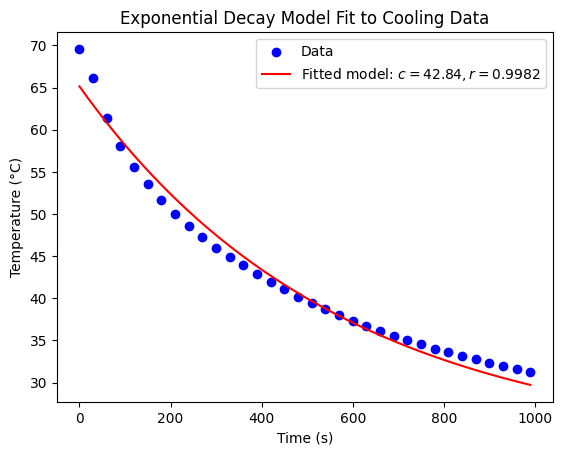

Fitted parameters: c = 42.84, r = 0.9982
Time to reach 26°C: 1383.85 seconds


In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
time = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990])
temperature = np.array([69.58, 66.11, 61.41, 58.07, 55.60, 53.58, 51.66, 50.05, 48.52, 47.24, 46.00, 44.96, 43.96, 42.92, 41.95, 41.05, 40.18, 39.40, 38.70, 38.00, 37.32, 36.67, 36.08, 35.50, 35.00, 34.53, 34.04, 33.59, 33.20, 32.76, 32.37, 32.00, 31.64, 31.30])

# Ambient temperature as offset
k = 22.3

# Model function with exponential decay plus an offset
def exponential_decay_model(t, c, r):
    return c * r**t + k

# Fit the model
params, _ = curve_fit(exponential_decay_model, time, temperature, p0=[47, 0.99])  # Initial guess for c and r
c_fit, r_fit = params

# Plot the data and the fitted model
plt.scatter(time, temperature, color='blue', label='Data')
t_fit = np.linspace(0, max(time), 400)
T_fit = exponential_decay_model(t_fit, c_fit, r_fit)
plt.plot(t_fit, T_fit, color='red', label=f'Fitted model: $c={c_fit:.2f}, r={r_fit:.4f}$')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Exponential Decay Model Fit to Cooling Data')
plt.show()

# Calculate the time to reach 26°C using the model
from scipy.optimize import fsolve
time_to_26 = fsolve(lambda t: exponential_decay_model(t, c_fit, r_fit) - 26, 1000)  # Start search at 1000 seconds

print(f"Fitted parameters: c = {c_fit:.2f}, r = {r_fit:.4f}")
print(f"Time to reach 26°C: {time_to_26[0]:.2f} seconds")


To model the temperature cooling data in the form

$$ m(x) = c \cdot r^x + k $$

where $ x $ represents the time, $ m(x) $ is the temperature at time $ x $, $ c $ and $ k $ are constants, and $ r $ is the base of the exponential function, we can use an exponential decay model adjusted for an offset.

This model represents a situation where the temperature decays exponentially towards a base level or offset $ k $, starting from an initial difference of $ c $ from $ k $, with $ r $ determining the rate of decay per unit time.

The form

$$ m(x) = c \cdot r^x + k $$

can be fitted to the given data to estimate $ c $, $ r $, and $ k $. This differs slightly from the Newton's law form in that it directly sets the asymptotic temperature into the model rather than inferring it through the initial conditions and decay rate alone.

### Step-by-Step to Fit the Model:
1. **Define the model function**: Here, $ k $ should ideally be close to the ambient temperature since the temperature will stabilize near this value. We can set $ k = 22.3 $°C, the ambient temperature, and fit $ c $ and $ r $ to the data.
2. **Fit the model**: Use non-linear least squares to estimate the parameters $ c $ and $ r $.
3. **Predict the time to reach 26°C**: Use the model equation to solve for $ x $ when $ m(x) = 26 $°C.


In this code:
- `curve_fit` is used to estimate the best fit values of $ c $ and $ r $ using the model defined.
- `fsolve` is used to

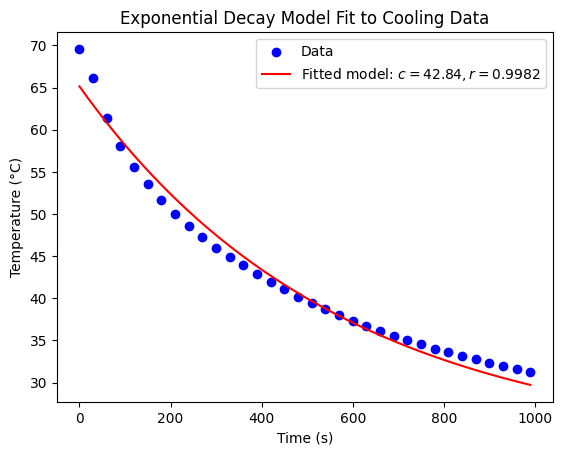

Fitted parameters: c = 42.84, r = 0.9982
Time to reach 26°C: 1383.85 seconds


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
time = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990])
temperature = np.array([69.58, 66.11, 61.41, 58.07, 55.60, 53.58, 51.66, 50.05, 48.52, 47.24, 46.00, 44.96, 43.96, 42.92, 41.95, 41.05, 40.18, 39.40, 38.70, 38.00, 37.32, 36.67, 36.08, 35.50, 35.00, 34.53, 34.04, 33.59, 33.20, 32.76, 32.37, 32.00, 31.64, 31.30])

# Ambient temperature as offset
k = 22.3

# Model function with exponential decay plus an offset
def exponential_decay_model(t, c, r):
    return c * r**t + k

# Fit the model
params, _ = curve_fit(exponential_decay_model, time, temperature, p0=[47, 0.99])  # Initial guess for c and r
c_fit, r_fit = params

# Plot the data and the fitted model
plt.scatter(time, temperature, color='blue', label='Data')
t_fit = np.linspace(0, max(time), 400)
T_fit = exponential_decay_model(t_fit, c_fit, r_fit)
plt.plot(t_fit, T_fit, color='red', label=f'Fitted model: $c={c_fit:.2f}, r={r_fit:.4f}$')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Exponential Decay Model Fit to Cooling Data')
plt.show()

# Calculate the time to reach 26°C using the model
from scipy.optimize import fsolve
time_to_26 = fsolve(lambda t: exponential_decay_model(t, c_fit, r_fit) - 26, 1000)  # Start search at 1000 seconds

print(f"Fitted parameters: c = {c_fit:.2f}, r = {r_fit:.4f}")
print(f"Time to reach 26°C: {time_to_26[0]:.2f} seconds")
